# Adventure Works Cycles

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pivottablejs import pivot_ui
from IPython.display import HTML
from IPython.display import IFrame
from IPython.core.display import display, HTML
import seaborn as sns
display(HTML("<style>.container { width:100% !important; }</style>"))
import json, io
import dataframe_image as dfi
pd.options.display.float_format = '{:,.2f}'.format
#import pandas_profiling
# import data from github url
url1='https://github.com/DoodleScheduling/hiring-challenges/raw/master/data-analyst/adventure_works_purchase_orders.tar.gz'
df1 = pd.read_csv(url1,compression='gzip',header=0, delimiter=',',  quotechar='"',error_bad_lines=False)
df1.rename(columns={"adventure_works_purchase_orders.csv": "SalesOrderNumber"}, inplace=True)
df1['OrderDate'] = pd.to_datetime(df1['OrderDate'])
df1['Year'] = df1['OrderDate'].dt.year
df1['Quarter'] = df1['OrderDate'].dt.quarter
df1['YearQuarter']= df1["Year"].astype(str) +'-'+'Q'+ df1["Quarter"].astype(str)
df1['Month'] = df1['OrderDate'].dt.month
##df1['MonthDate'] = df1['OrderDate'].values.astype('datetime64[M]')
df1['Day'] = df1['OrderDate'].dt.day
df1['FsQuarter'] = df1['OrderDate'].dt.to_period('Q-JUN')
df1['FsYear'] = df1['FsQuarter'].dt.qyear
df1['FiscalQuarter'] = pd.PeriodIndex(df1['OrderDate'], freq='Q-JUN').strftime('Q%q')
df1['FsYearQuarter']= df1['FsYear'].astype(str).astype(str)+'-'+df1['FiscalQuarter'].astype(str)
#df1['FiscalMonth'] = pd.PeriodIndex(df1['OrderDate'], freq='Q-JUN').strftime('%m')
#df1['UnitPriceDiscount%'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df1['UnitPriceDiscount']])
df1['UnitPriceDiscount%']=df1['UnitPriceDiscount']*100
df1['TotalCost']=(df1['Unit_Cost']+df1['Unit_Freight_Cost'])*df1['OrderQty']
df1['Revenue']=(df1['UnitPrice']-(df1['UnitPrice']*df1['UnitPriceDiscount']) )*df1['OrderQty']
df1['Margin']=df1['Revenue']-df1['TotalCost']
display(df1.head(), df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41884 entries, 0 to 41883
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   SalesOrderNumber      41884 non-null  object        
 1   OrderDate             41884 non-null  datetime64[ns]
 2   DueDate               41884 non-null  object        
 3   ShipDate              41884 non-null  object        
 4   Sales_Person          41884 non-null  object        
 5   Sales_Region          41884 non-null  object        
 6   Sales_Province        41884 non-null  object        
 7   Sales_City            41884 non-null  object        
 8   Sales_Postal_Code     41884 non-null  int64         
 9   Customer_Code         41884 non-null  object        
 10  Customer_Name         41884 non-null  object        
 11  Customer_Region       41884 non-null  object        
 12  Customer_Province     41884 non-null  object        
 13  Customer_City   

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,Month,Day,FsQuarter,FsYear,FiscalQuarter,FsYearQuarter,UnitPriceDiscount%,TotalCost,Revenue,Margin
0,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,7,1,2006Q1,2006,Q1,2006-Q1,0.00,"1,949.44","3,374.99","1,425.55"
1,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,7,1,2006Q1,2006,Q1,2006-Q1,0.00,"5,848.31","10,124.97","4,276.66"
2,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,7,1,2006Q1,2006,Q1,2006-Q1,0.00,"1,949.44","3,374.99","1,425.55"
3,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,7,1,2006Q1,2006,Q1,2006-Q1,0.00,"1,963.50","3,399.99","1,436.49"
4,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,7,1,2006Q1,2006,Q1,2006-Q1,0.00,"1,963.50","3,399.99","1,436.49"


None

In [2]:

#pivot_ui(df1, outfile_path='pivottablejs.html')
#HTML('pivottablejs.html')
pivot_ui(df1)


FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4,Total
Sales_Region,,,,,,,,,,,,,
Total,"3,396","5,035","3,611","5,017","19,665","14,333","9,058","14,136","24,734","17,772","11,193","17,075","145,025"
United States,"3,396","5,035","3,611","5,017","18,318","13,456","8,539","13,276","21,806","15,693","9,834","14,990","132,971"
France,0,0,0,0,"1,347",877,519,860,"2,928","2,079","1,358","2,085","12,053"
Germany,0,0,0,0,0,0,0,0,0,0,1,0,1


FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Sales_Region,,,,,,,,,,,,
United States,100%,100%,100%,100%,93%,94%,94%,94%,88%,88%,88%,88%
France,0%,0%,0%,0%,7%,6%,6%,6%,12%,12%,12%,12%
Germany,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


FsYear,2006,2007,2008
Sales_Region,,,
United States,100%,94%,88%
France,0%,6%,12%
Germany,0%,0%,0%


FsYear,2006,2007,2008
Sales_Region,,,
United States,100%,94%,88%
France,0%,6%,12%
Germany,0%,0%,0%


FsYear,2006,2007,2008,Total,07/06%,08/07%
Sales_Region,,,,,,
Total,"22,953,363","36,995,711","40,181,556","100,130,630",61,9
United States,"22,953,363","34,731,526","35,501,341","93,186,229",51,2
France,0,"2,264,186","4,679,878","6,944,064",0,107
Germany,0,0,337,337,0,0


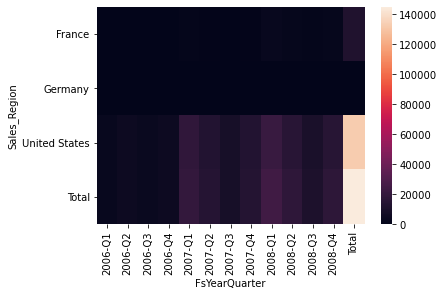

In [3]:
df01=pd.pivot_table(df1,
              values='OrderQty',
              index=['Sales_Region'],
              columns=['FsYearQuarter'],
              aggfunc='sum',
              margins=True,
              margins_name='Total').fillna(0)
#df01['% Share'] = (df01[2007,4]/df01[2007,4].sum())*100
df001=pd.crosstab(df1.Sales_Region,df1.FsYearQuarter, values=df1.OrderQty, aggfunc='sum',normalize='columns').fillna(0)
df002=pd.crosstab(df1.Sales_Region,df1.FsYear, values=df1.OrderQty, aggfunc='sum',normalize='columns').fillna(0)
df003=pd.crosstab(df1.Sales_Region,df1.FsYear, values=df1.Revenue, aggfunc='sum',normalize='columns').fillna(0)
df0004=pd.pivot_table(df1,
              values='Revenue',
              index=['Sales_Region'],
              columns=['FsYear'],
              aggfunc='sum',
              margins=True,
              margins_name='Total').fillna(0)
df0004['07/06%']=((df0004[2007]-df0004[2006])/df0004[2006]*100).replace([np.inf, -np.inf], np.nan).fillna(0)
df0004['08/07%']=((df0004[2008]-df0004[2007])/df0004[2007]*100).replace([np.inf, -np.inf], np.nan).fillna(0)
cl=sns.light_palette("lightGreen", as_cmap=True)
display(df01.sort_values(by=('Total'), ascending=False).style.background_gradient(cmap=cl,axis=0).format("{:,.0f}").set_precision(0).set_caption('Heat Map of Order Quantity by Region and Quarters') )
display(df001.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=0).format("{:.0%}").set_precision(0).set_caption('Share of Order Quantity by Region and Quarters'))
display(df002.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=0).format("{:.0%}").set_precision(0).set_caption('Share of Order Quantity by Region and Year') )
display(df003.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=0).format("{:.0%}").set_precision(0).set_caption('Share of Revenue by Region and Year') )
display(df0004.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=0).format("{:,.0f}").set_precision(0).set_caption('Revenue by Region and Year and YoY Growth in %') )
#png002=df002.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=0).format("{:.0%}").set_precision(0).set_caption('Share of Order Quantity by Region and Year')
display(sns.heatmap(df01, annot=False))
#dfi.export(png002, 'png002.png')


FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Category,,,,,,,,,,,,
Bikes,55,60,66,54,43,43,49,42,41,40,46,41
Components,61,66,63,60,41,40,35,39,38,37,36,37
Clothing,61,70,77,63,35,33,36,33,29,30,32,30
Accessories,54,67,56,63,33,36,31,37,26,30,31,30


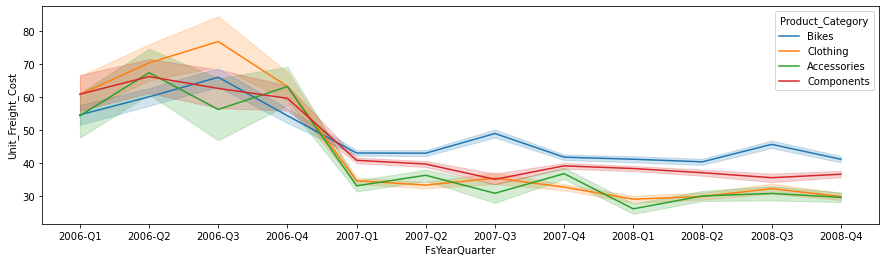

In [4]:
df02=pd.pivot_table(df1,
              values='Unit_Freight_Cost',
              index=['Product_Category'],
              columns=['FsYearQuarter'],
              aggfunc='mean').fillna(0)
#df01['% Share'] = (df01[2007,4]/df01[2007,4].sum())*100
cl=sns.light_palette("lightGreen", as_cmap=True)
display(df02.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:,.0f}").set_precision(0).set_caption('Heat Map of Average Unit Freight Cost by Product Category') )
#display(sns.heatmap(df02))
fig, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(data=df1, x="FsYearQuarter", y="Unit_Freight_Cost", hue="Product_Category",ax=ax)

## France

### Unit Cost in France

FsYearQuarter,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Sub_Category,,,,,,,,
Touring Bikes,0,0,0,0,894,915,929,"1,138"
Road Bikes,795,829,761,776,931,868,898,"1,121"
Mountain Bikes,"1,063","1,048",999,"1,029",702,795,988,"1,051"


FsYear,2007,2008
Product_Category,,
Bikes,869,936
Components,263,225
Clothing,25,27
Accessories,12,16


FsYear,2007,2008
Product_Category,,
Bikes,76%,77%
Components,22%,21%
Clothing,2%,1%
Accessories,0%,0%


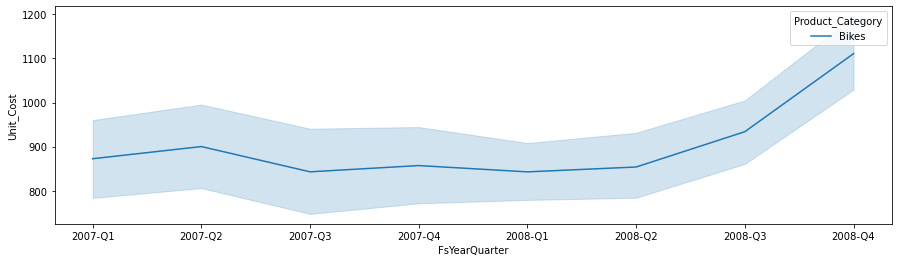

In [5]:
df0201=pd.pivot_table(df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes']))],
              values='Unit_Cost',
              index=['Product_Sub_Category'],
              columns=['FsYearQuarter'],
              aggfunc='mean').fillna(0)
#df01['% Share'] = (df01[2007,4]/df01[2007,4].sum())*100
cl=sns.light_palette("lightGreen", as_cmap=True)
frc=pd.pivot_table(df1[(df1['Sales_Region'].isin(['France']))],
              values='Unit_Cost',
              index=['Product_Category'],
              columns=['FsYear'],
              aggfunc='mean').fillna(0)
frc1=pd.crosstab(df1[(df1['Sales_Region'].isin(['France']))].Product_Category,df1[(df1['Sales_Region'].isin(['France']))].FsYear, values=df1[(df1['Sales_Region'].isin(['France']))].Unit_Cost, aggfunc='sum',normalize='columns').fillna(0)
display(df0201.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:,.0f}").set_precision(0).set_caption('Heat Map of Average Unit Cost by Product Sub Category in France') )
display(frc.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:,.0f}").set_precision(0).set_caption('Heat Map of Average Unit Cost by Product Category in France') )
display(frc1.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:.0%}").set_precision(0).set_caption('Share of Unit Cost by Product Category in France') )
fig, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(data=df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ], x="FsYearQuarter", y="Unit_Cost", hue="Product_Category",ax=ax)


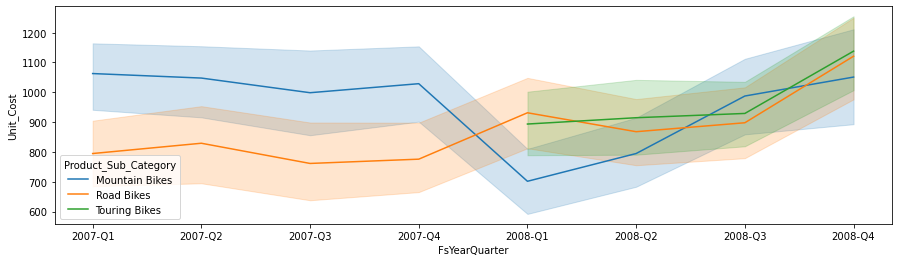

In [6]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(data=df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ], x="FsYearQuarter", y="Unit_Cost", hue="Product_Sub_Category",ax=ax)

### Unit Freight Cost in France

FsYearQuarter,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Sub_Category,,,,,,,,
Touring Bikes,0,0,0,0,61,80,77,63
Road Bikes,62,46,41,47,48,51,47,44
Mountain Bikes,34,35,38,33,31,28,28,26


FsYear,2007,2008
Product_Category,,
Bikes,"1,757,577","3,643,949"
Components,"439,120","865,489"
Clothing,"57,739","114,747"
Accessories,"9,749","55,694"


FsYear,2007,2008
Product_Category,,
Bikes,78%,78%
Components,19%,18%
Clothing,3%,2%
Accessories,0%,1%


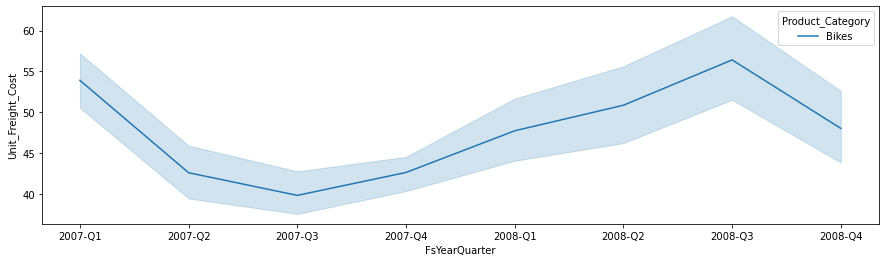

In [7]:
df03=pd.pivot_table(df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes']))],
              values='Unit_Freight_Cost',
              index=['Product_Sub_Category'],
              columns=['FsYearQuarter'],
              aggfunc='mean').fillna(0)
#df01['% Share'] = (df01[2007,4]/df01[2007,4].sum())*100
cl=sns.light_palette("lightGreen", as_cmap=True)
frr=pd.pivot_table(df1[(df1['Sales_Region'].isin(['France']))],
              values='Revenue',
              index=['Product_Category'],
              columns=['FsYear'],
              aggfunc='sum').fillna(0)
frr1=pd.crosstab(df1[(df1['Sales_Region'].isin(['France']))].Product_Category,df1[(df1['Sales_Region'].isin(['France']))].FsYear, values=df1[(df1['Sales_Region'].isin(['France']))].Revenue, aggfunc='sum',normalize='columns').fillna(0)
display(df03.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:,.0f}").set_precision(0).set_caption('Heat Map of Average Unit Freight Cost by Product Sub Category in France') )
display(frr.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:,.0f}").set_precision(0).set_caption('Heat Map of Revenue by Product Category in France') )
display(frr1.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:.0%}").set_precision(0).set_caption('Share of Revenue by Product Category in France') )
fig, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(data=df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ], x="FsYearQuarter", y="Unit_Freight_Cost", hue="Product_Category",ax=ax)


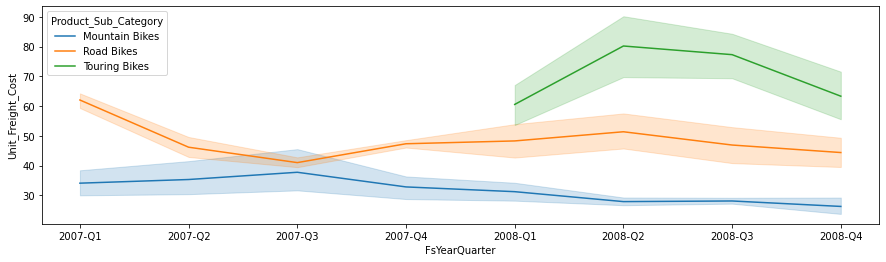

In [8]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(data=df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ], x="FsYearQuarter", y="Unit_Freight_Cost", hue="Product_Sub_Category",ax=ax)

FsYearQuarter,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Sub_Category,,,,,,,,
Touring Bikes,0,0,0,0,322,210,255,287
Road Bikes,369,189,150,219,207,239,157,197
Mountain Bikes,100,81,63,84,194,180,91,134


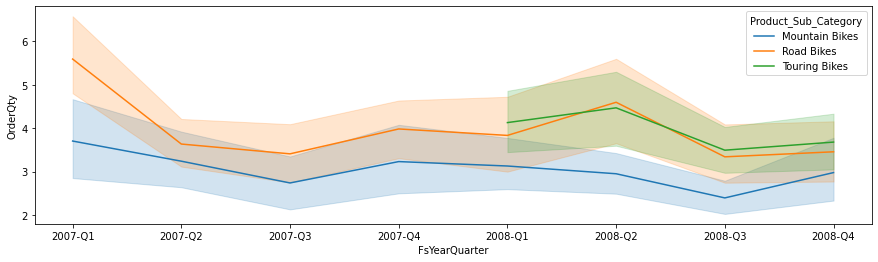

In [9]:
df04=pd.pivot_table(df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ],
              values='OrderQty',
              index=['Product_Sub_Category'],
              columns=['FsYearQuarter'],
              aggfunc='sum').fillna(0)
#df01['% Share'] = (df01[2007,4]/df01[2007,4].sum())*100
cl=sns.light_palette("lightGreen", as_cmap=True)
display(df04.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:,.0f}").set_precision(0).set_caption('Heat Map of Order Quantity in France by Product Sub Category') )


fig, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(data=df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ], x="FsYearQuarter", y="OrderQty", hue="Product_Sub_Category",ax=ax)

FsYearQuarter,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Sub_Category,,,,,,,,
Touring Bikes,0,0,0,0,"442,393","321,012","380,332","417,459"
Road Bikes,"443,731","246,420","172,487","259,893","303,315","314,948","205,364","272,377"
Mountain Bikes,"197,694","153,814","120,634","162,904","298,110","284,830","169,026","234,784"


FsYear,2007,2008,Total,08/07%
Product_Sub_Category,,,,
Total,"1,757,577","3,643,949","5,401,526",107
Touring Bikes,0,"1,561,195","1,561,195",0
Road Bikes,"1,122,531","1,096,004","2,218,534",-2
Mountain Bikes,"635,047","986,750","1,621,797",55


FsYear,2007,2008
Product_Sub_Category,,
Touring Bikes,0%,43%
Road Bikes,64%,30%
Mountain Bikes,36%,27%


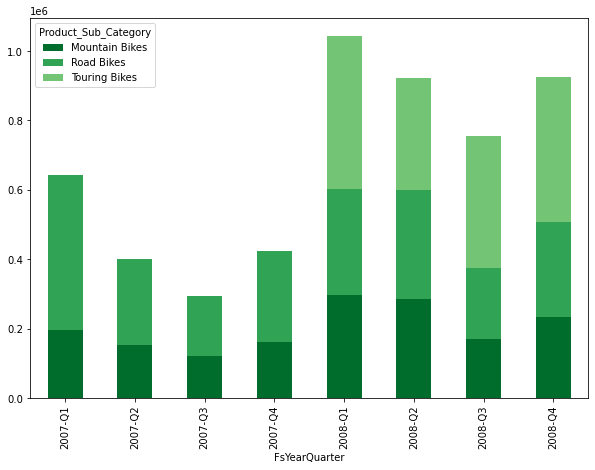

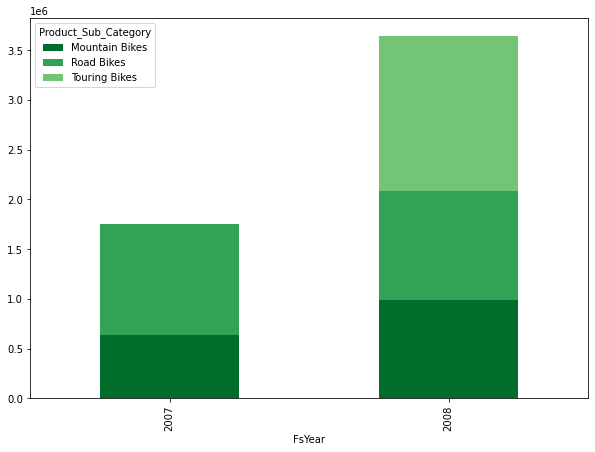

In [10]:
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color
df05=pd.pivot_table(df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ],
              values='Revenue',
              index=['Product_Sub_Category'],
              columns=['FsYearQuarter'],
              aggfunc='sum').fillna(0)
#df01['% Share'] = (df01[2007,4]/df01[2007,4].sum())*100
cl=sns.light_palette("lightGreen", as_cmap=True)
display(df05.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=0).format("{:,.0f}").set_precision(0).set_caption('Heat Map of Revenue in France by Product Sub Category') )
colors = ["#006D2C", "#31A354","#74C476"]


df005=pd.pivot_table(df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ],
              values='Revenue',
              index=['Product_Sub_Category'],
              columns=['FsYear'],
              aggfunc='sum',
              margins=True,
              margins_name='Total'      
                    ).fillna(0)
df005['08/07%']=((df005[2008]-df005[2007])/df005[2007]*100).replace([np.inf, -np.inf], np.nan).fillna(0)
#df01['% Share'] = (df01[2007,4]/df01[2007,4].sum())*100
cl=sns.light_palette("lightGreen", as_cmap=True)
display(df005.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=0).format("{:,.0f}", na_rep="-").applymap(color_negative_red).set_precision(0).set_caption('Heat Map of Revenue in France by Product Sub Category') )


frr2=pd.crosstab(df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ].Product_Sub_Category,
                 df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ].FsYear, 
                 values=df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ].Revenue, 
                 aggfunc='sum',normalize='columns').fillna(0)
display(frr2.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=0).format("{:.0%}").set_precision(0).set_caption('Share of Revenue in France by Product Sub Category') )

df051=pd.pivot_table(df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ],
              values='Revenue',
              index=['FsYearQuarter'],
              columns=['Product_Sub_Category'],
              aggfunc='sum').fillna(0)

df051.plot.bar(stacked=True, color=colors, figsize=(10,7))

df052=pd.pivot_table(df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ],
              values='Revenue',
              index=['FsYear'],
              columns=['Product_Sub_Category'],
              aggfunc='sum').fillna(0)

df052.plot.bar(stacked=True, color=colors, figsize=(10,7))

#fig, ax = plt.subplots(figsize=(20, 4))
#sns.lineplot(data=df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ], x="Year", y="Revenue", hue="Product_Sub_Category",ax=ax)

FsYearQuarter,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Category,,,,,,,,
Accessories,"-3,343","-2,069",-582,"-1,556","-1,823","-2,573",592,"-2,244"
Bikes,"223,297","149,303","110,293","157,141","337,684","324,561","260,709","180,069"
Clothing,"-7,040","-2,343","-1,255","-2,751","-9,048","-7,359","-1,796","-8,637"
Components,"59,647","37,673","16,378","39,663","107,833","64,914","39,260","34,043"


FsYear,2007,2008
Product_Category,,
Accessories,"-7,550","-6,048"
Bikes,"640,035","1,103,023"
Clothing,"-13,389","-26,840"
Components,"153,361","246,050"


FsYear,2007,2008
Product_Sub_Category,,
Touring Bikes,0,"401,105"
Mountain Bikes,"275,424","394,005"
Road Bikes,"364,611","307,912"


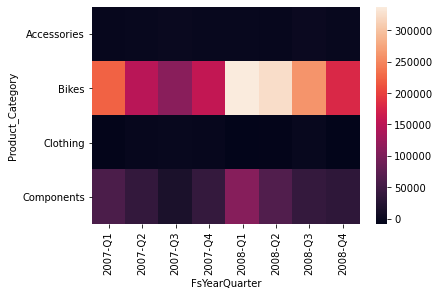

In [11]:
df11=pd.pivot_table(df1[df1['Sales_Region'].isin(['France'])],
              values='Margin',
              index=['Product_Category'],
              columns=['FsYearQuarter'],
              aggfunc='sum').fillna(0)
df12=pd.pivot_table(df1[df1['Sales_Region'].isin(['France'])],
              values='Margin',
              index=['Product_Category'],
              columns=['FsYear'],
              aggfunc='sum').fillna(0)
df13=pd.pivot_table(df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ],
              values='Margin',
              index=['Product_Sub_Category'],
              columns=['FsYear'],
              aggfunc='sum').fillna(0)
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color
cl=sns.light_palette("lightgreen", as_cmap=True)
display(df11.style.background_gradient(cmap=cl).format("{:,.0f}", na_rep="-").applymap(color_negative_red).set_caption('Heat Map of Margin by Product Category in France'))
display(df12.style.background_gradient(cmap=cl).format("{:,.0f}", na_rep="-").applymap(color_negative_red).set_caption('Heat Map of Margin by Product Category in France'))
display(df13.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl).format("{:,.0f}", na_rep="-").applymap(color_negative_red).set_caption('Heat Map of Margin by Product Sub Category in France'))
display(sns.heatmap(df11))

FsYearQuarter,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Category,,,,,,,,
Bikes,30%,0%,2%,2%,20%,5%,2%,40%
Accessories,10%,2%,0%,2%,15%,5%,2%,5%
Clothing,5%,5%,2%,2%,10%,5%,5%,5%
Components,2%,0%,0%,0%,2%,2%,0%,0%


FsYearQuarter,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Sub_Category,,,,,,,,
Mountain Bikes,0%,0%,0%,0%,2%,0%,0%,40%
Road Bikes,30%,0%,2%,2%,5%,5%,2%,2%
Touring Bikes,0%,0%,0%,0%,20%,2%,0%,2%


FsYearQuarter,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Sub_Category,,,,,,,,
Mountain Bikes,0%,0%,0%,0%,0%,0%,0%,6%
Touring Bikes,0%,0%,0%,0%,11%,0%,0%,0%
Road Bikes,1%,0%,0%,0%,0%,0%,0%,0%


FsYear,2007,2008
Product_Sub_Category,,
Touring Bikes,0%,3%
Mountain Bikes,0%,1%
Road Bikes,0%,0%


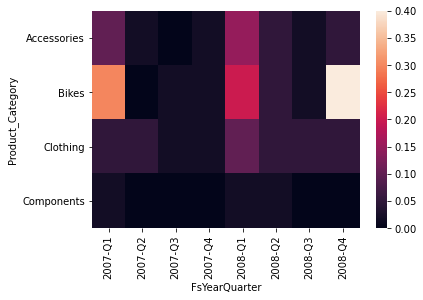

In [12]:
df14=pd.pivot_table(df1[(df1['Sales_Region'].isin(['France']))],
              values='UnitPriceDiscount',
              index=['Product_Category'],
              columns=['FsYearQuarter'],
              aggfunc='max')
df15=pd.pivot_table(df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes']))],
              values='UnitPriceDiscount',
              index=['Product_Sub_Category'],
              columns=['FsYearQuarter'],
              aggfunc='max').fillna(0)
df16=pd.pivot_table(df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes']))],
              values='UnitPriceDiscount',
              index=['Product_Sub_Category'],
              columns=['FsYearQuarter'],
              aggfunc='mean').fillna(0)
df17=pd.pivot_table(df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes']))],
              values='UnitPriceDiscount',
              index=['Product_Sub_Category'],
              columns=['FsYear'],
              aggfunc='mean').fillna(0)
cl=sns.light_palette("red", as_cmap=True)
display(df14.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:.0%}").set_precision(0).set_caption('Heat Map of Highest Unit Price Discount percentage by Product Category in France') )
display(df15.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:.0%}").set_precision(0).set_caption('Heat Map of Highest Unit Price Discount percentage by Product Sub Category in France') )
display(df16.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:.0%}").set_precision(0).set_caption('Heat Map of Average Unit Price Discount percentage by Product Sub Category in France') )
display(df17.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:.0%}").set_precision(0).set_caption('Heat Map of Average Unit Price Discount percentage by Product Sub Category in France') )
display(sns.heatmap(df14))

# United States

### United States Unit Cost

FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Sub_Category,,,,,,,,,,,,
Touring Bikes,0,0,0,0,0,0,0,0,904,902,917,"1,144"
Road Bikes,752,863,850,860,793,808,789,802,914,899,886,"1,129"
Mountain Bikes,"1,905","1,905","1,905","1,905","1,030","1,032","1,016","1,031",665,683,753,870


FsYear,2006,2007,2008
Product_Category,,,
Bikes,"1,158",870,890
Components,426,249,222
Clothing,24,26,26
Accessories,13,12,16


FsYear,2006,2007,2008
Product_Category,,,
Bikes,90%,80%,81%
Components,10%,19%,18%
Clothing,0%,1%,1%
Accessories,0%,0%,0%


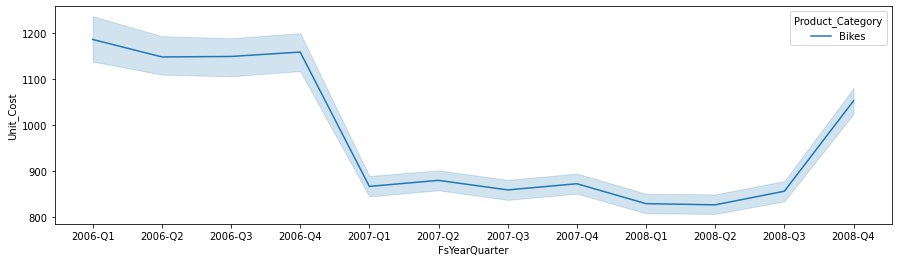

In [13]:
us0201=pd.pivot_table(df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes']))],
              values='Unit_Cost',
              index=['Product_Sub_Category'],
              columns=['FsYearQuarter'],
              aggfunc='mean').fillna(0)
#df01['% Share'] = (df01[2007,4]/df01[2007,4].sum())*100
cl=sns.light_palette("lightGreen", as_cmap=True)
usc=pd.pivot_table(df1[(df1['Sales_Region'].isin(['United States']))],
              values='Unit_Cost',
              index=['Product_Category'],
              columns=['FsYear'],
              aggfunc='mean').fillna(0)
usc1=pd.crosstab(df1[(df1['Sales_Region'].isin(['United States']))].Product_Category,df1[(df1['Sales_Region'].isin(['United States']))].FsYear, values=df1[(df1['Sales_Region'].isin(['United States']))].Unit_Cost, aggfunc='sum',normalize='columns').fillna(0)
display(us0201.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:,.0f}").set_precision(0).set_caption('Heat Map of Average Unit Cost by Product Sub Category in United States') )
display(usc.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:,.0f}").set_precision(0).set_caption('Heat Map of Average Unit Cost by Product Category in United States') )
display(usc1.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:.0%}").set_precision(0).set_caption('Share of Unit Cost by Product Category in United States') )
fig, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(data=df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes'])) ], x="FsYearQuarter", y="Unit_Cost", hue="Product_Category",ax=ax)

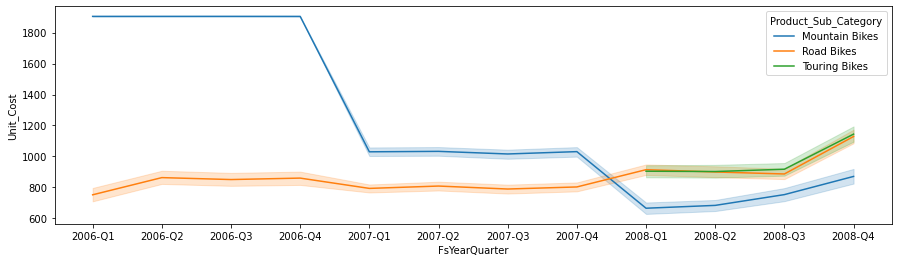

In [14]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(data=df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes'])) ], x="FsYearQuarter", y="Unit_Cost", hue="Product_Sub_Category",ax=ax)

### Unit Freight Cost in United States

FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Sub_Category,,,,,,,,,,,,
Touring Bikes,0,0,0,0,0,0,0,0,43,44,45,46
Road Bikes,30,39,45,38,43,44,50,43,43,41,47,42
Mountain Bikes,96,117,121,96,41,42,49,40,36,33,42,34


FsYear,2006,2007,2008
Product_Category,,,
Bikes,"21,154,003","28,145,143","28,714,258"
Components,"1,662,587","5,613,207","5,593,927"
Clothing,"88,354","833,060","857,848"
Accessories,"48,418","140,116","335,307"


FsYear,2006,2007,2008
Product_Category,,,
Bikes,92%,81%,81%
Components,7%,16%,16%
Clothing,0%,2%,2%
Accessories,0%,0%,1%


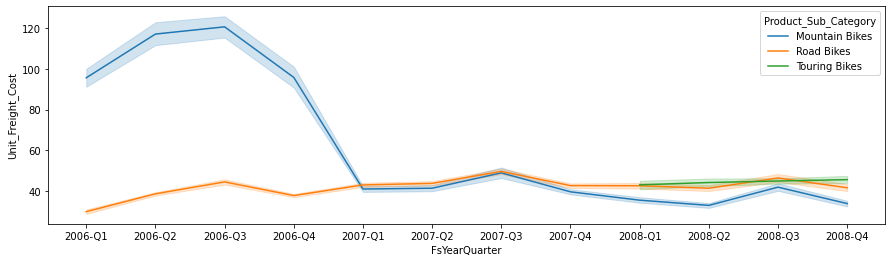

In [15]:
us1=pd.pivot_table(df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes']))],
              values='Unit_Freight_Cost',
              index=['Product_Sub_Category'],
              columns=['FsYearQuarter'],
              aggfunc='mean').fillna(0)
#df01['% Share'] = (df01[2007,4]/df01[2007,4].sum())*100
cl=sns.light_palette("lightGreen", as_cmap=True)
us2=pd.pivot_table(df1[(df1['Sales_Region'].isin(['United States']))],
              values='Revenue',
              index=['Product_Category'],
              columns=['FsYear'],
              aggfunc='sum').fillna(0)
us3=pd.crosstab(df1[(df1['Sales_Region'].isin(['United States']))].Product_Category,df1[(df1['Sales_Region'].isin(['United States']))].FsYear, values=df1[(df1['Sales_Region'].isin(['United States']))].Revenue, aggfunc='sum',normalize='columns').fillna(0)
display(us1.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:,.0f}").set_precision(0).set_caption('Heat Map of Average Unit Freight Cost by Product Sub Category in United States') )
display(us2.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:,.0f}").set_precision(0).set_caption('Heat Map of Revenue by Product Category in United States') )
display(us3.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:.0%}").set_precision(0).set_caption('Share of Revenue by Product Category in United States') )
fig, ax = plt.subplots(figsize=(15, 4))
#sns.lineplot(data=df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes'])) ], x="FsYearQuarter", y="Unit_Freight_Cost", hue="Product_Category",ax=ax)
sns.lineplot(data=df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes'])) ], x="FsYearQuarter", y="Unit_Freight_Cost", hue="Product_Sub_Category",ax=ax)


FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Category,,,,,,,,,,,,
Bikes,2%,2%,0%,35%,30%,5%,5%,5%,20%,10%,5%,40%
Clothing,10%,5%,5%,10%,10%,10%,10%,15%,10%,10%,5%,15%
Accessories,0%,2%,0%,0%,10%,5%,2%,5%,15%,5%,2%,5%
Components,0%,0%,0%,0%,5%,0%,0%,5%,5%,2%,0%,2%


FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Sub_Category,,,,,,,,,,,,
Mountain Bikes,2%,2%,0%,35%,5%,2%,2%,2%,5%,5%,5%,40%
Road Bikes,0%,0%,0%,2%,30%,5%,5%,5%,10%,5%,5%,10%
Touring Bikes,0%,0%,0%,0%,0%,0%,0%,0%,20%,10%,2%,5%


FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Sub_Category,,,,,,,,,,,,
Mountain Bikes,0%,0%,0%,12%,0%,0%,0%,0%,0%,0%,0%,9%
Touring Bikes,0%,0%,0%,0%,0%,0%,0%,0%,10%,0%,0%,0%
Road Bikes,0%,0%,0%,0%,1%,0%,0%,0%,0%,0%,0%,0%


FsYear,2006,2007,2008
Product_Sub_Category,,,
Touring Bikes,0%,0%,3%
Mountain Bikes,3%,0%,2%
Road Bikes,0%,0%,0%


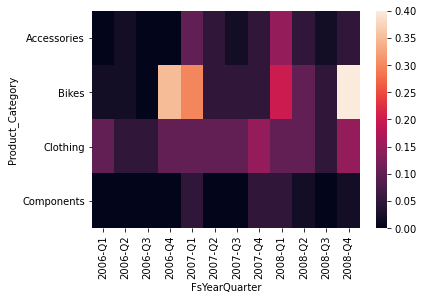

In [16]:

df2=pd.pivot_table(df1[(df1['Sales_Region'].isin(['United States']))],
              values='UnitPriceDiscount',
              index=['Product_Category'],
              columns=['FsYearQuarter'],
              aggfunc='max')
df21=pd.pivot_table(df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes']))],
              values='UnitPriceDiscount',
              index=['Product_Sub_Category'],
              columns=['FsYearQuarter'],
              aggfunc='max').fillna(0)
df22=pd.pivot_table(df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes']))],
              values='UnitPriceDiscount',
              index=['Product_Sub_Category'],
              columns=['FsYearQuarter'],
              aggfunc='mean').fillna(0)
df23=pd.pivot_table(df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes']))],
              values='UnitPriceDiscount',
              index=['Product_Sub_Category'],
              columns=['FsYear'],
              aggfunc='mean').fillna(0)
cl=sns.light_palette("red", as_cmap=True)
display(df2.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:.0%}").set_precision(0).set_caption('Heat Map of Highest Unit Price Discount percentage by Product Category') )
display(df21.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:.0%}").set_precision(0).set_caption('Heat Map of Highest Unit Price Discount percentage by Product Sub Category') )
display(df22.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:.0%}").set_precision(0).set_caption('Heat Map of Average Unit Price Discount percentage by Product Sub Category') )
display(df23.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:.0%}").set_precision(0).set_caption('Heat Map of Average Unit Price Discount percentage by Product Sub Category in United States') )
display(sns.heatmap(df2))

FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Sub_Category,,,,,,,,,,,,
Mountain Bikes,2%,2%,0%,35%,5%,2%,2%,2%,5%,5%,5%,40%
Shorts,0%,0%,0%,0%,5%,5%,0%,0%,10%,10%,5%,15%
Socks,10%,5%,5%,10%,0%,0%,0%,0%,5%,10%,5%,10%
Road Bikes,0%,0%,0%,2%,30%,5%,5%,5%,10%,5%,5%,10%
Caps,0%,2%,0%,0%,10%,5%,2%,5%,10%,5%,2%,5%
Touring Bikes,0%,0%,0%,0%,0%,0%,0%,0%,20%,10%,2%,5%
Vests,0%,0%,0%,0%,0%,0%,0%,0%,10%,10%,2%,5%
Helmets,0%,2%,0%,0%,10%,5%,2%,5%,15%,5%,0%,5%
Bike Racks,0%,0%,0%,0%,0%,0%,0%,0%,5%,5%,0%,5%


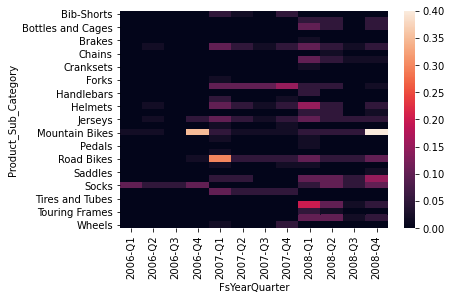

In [17]:

df3=pd.pivot_table(df1[(df1['Sales_Region'].isin(['United States']))],
              values='UnitPriceDiscount',
              index=['Product_Sub_Category'],
              columns=['FsYearQuarter'],
              aggfunc='max').fillna(0)
cl=sns.light_palette("red", as_cmap=True)
display(df3.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=1).format("{:.0%}").set_precision(0).set_caption('Heat Map of Highest Unit Price Discount percentage by Product Sub Category'))
display(sns.heatmap(df3))

In [18]:
df4=df1[df1['UnitPriceDiscount%']>=35].reset_index()
display(df4.head(), df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 226 non-null    int64         
 1   SalesOrderNumber      226 non-null    object        
 2   OrderDate             226 non-null    datetime64[ns]
 3   DueDate               226 non-null    object        
 4   ShipDate              226 non-null    object        
 5   Sales_Person          226 non-null    object        
 6   Sales_Region          226 non-null    object        
 7   Sales_Province        226 non-null    object        
 8   Sales_City            226 non-null    object        
 9   Sales_Postal_Code     226 non-null    int64         
 10  Customer_Code         226 non-null    object        
 11  Customer_Name         226 non-null    object        
 12  Customer_Region       226 non-null    object        
 13  Customer_Province   

,index,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,...,Month,Day,FsQuarter,FsYear,FiscalQuarter,FsYearQuarter,UnitPriceDiscount%,TotalCost,Revenue,Margin
0,5981,SO46323,2006-06-01,00:00.0,00:00.0,David Campbell,United States,Washington,Bellevue,98004,...,6,1,2006Q4,2006,Q4,2006-Q4,35.00,"1,938.80","2,209.99",271.19
1,5982,SO46323,2006-06-01,00:00.0,00:00.0,David Campbell,United States,Washington,Bellevue,98004,...,6,1,2006Q4,2006,Q4,2006-Q4,35.00,"1,938.80","2,209.99",271.19
2,5984,SO46323,2006-06-01,00:00.0,00:00.0,David Campbell,United States,Washington,Bellevue,98004,...,6,1,2006Q4,2006,Q4,2006-Q4,35.00,"1,938.80","2,209.99",271.19
3,5986,SO46323,2006-06-01,00:00.0,00:00.0,David Campbell,United States,Washington,Bellevue,98004,...,6,1,2006Q4,2006,Q4,2006-Q4,35.00,"1,938.80","2,209.99",271.19
4,6019,SO46327,2006-06-01,00:00.0,00:00.0,David Campbell,United States,Washington,Bellevue,98004,...,6,1,2006Q4,2006,Q4,2006-Q4,35.00,"3,927.39","4,387.49",460.10


None

In [19]:
pivot_ui(df4)

FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4,Total
Product_Sub_Category,,,,,,,,,,,,,
Total,"3,973,427","6,230,459","5,330,118","5,619,999","8,091,892","7,197,139","6,009,294","6,846,818","8,193,211","7,172,530","6,291,287","7,057,229","78,013,404"
Road Bikes,"1,226,848","2,520,639","2,275,227","2,489,959","4,619,237","4,185,708","3,550,491","4,084,577","3,182,410","2,649,516","2,402,635","2,681,858","35,869,105"
Mountain Bikes,"2,746,579","3,709,821","3,054,891","3,130,040","3,472,655","3,011,432","2,458,802","2,762,241","2,630,296","2,360,999","2,052,995","2,255,359","33,646,109"
Touring Bikes,0,0,0,0,0,0,0,0,"2,380,506","2,162,014","1,835,657","2,120,012","8,498,189"


FsYear,2006,2007,2008,Total,07/06%,08/07%
Product_Sub_Category,,,,,,
Total,"21,154,003","28,145,143","28,714,258","78,013,404",33,2
Road Bikes,"8,512,673","16,440,014","10,916,419","35,869,105",93,-34
Mountain Bikes,"12,641,330","11,705,130","9,299,650","33,646,109",-7,-21
Touring Bikes,0,0,"8,498,189","8,498,189",0,0


[2006, 2007, 2008, 'Total', '07/06%', '08/07%']

FsYear,2006,2007,2008
Product_Sub_Category,,,
Road Bikes,40%,58%,38%
Mountain Bikes,60%,42%,32%
Touring Bikes,0%,0%,30%


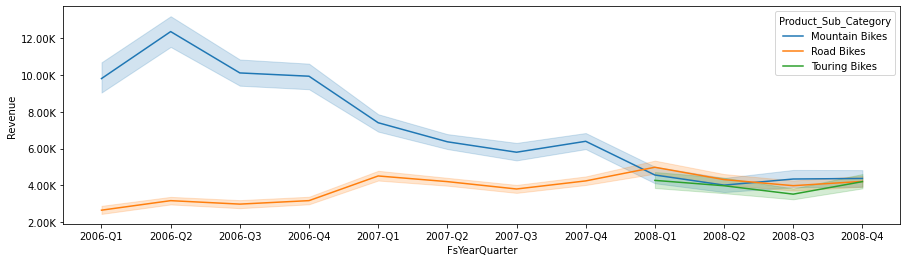

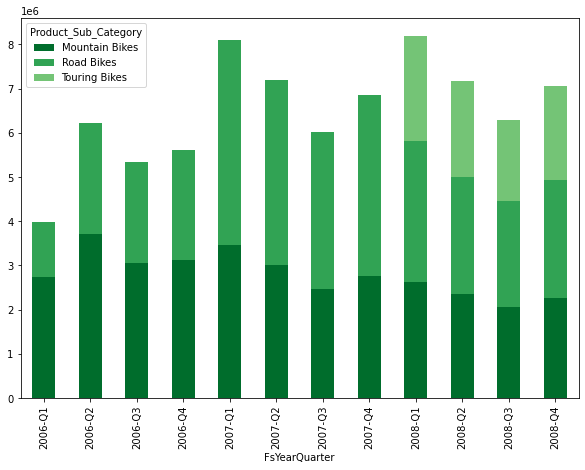

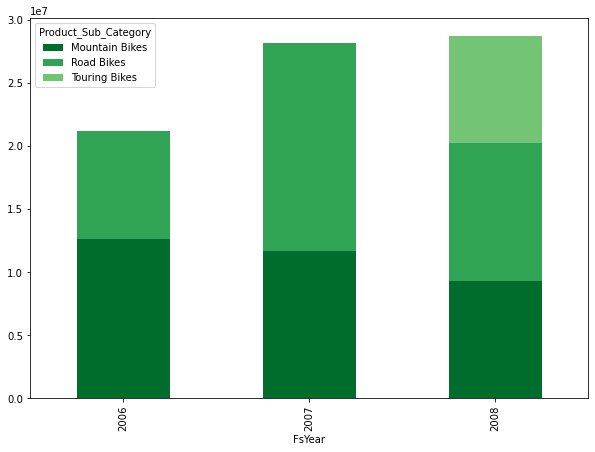

In [20]:
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color
df41=pd.pivot_table(df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes'])) ],
              values='Revenue',
              index=['Product_Sub_Category'],
              columns=['FsYearQuarter'],
              aggfunc='sum',
              margins=True,
              margins_name='Total'     
                   ).fillna(0)
#df01['% Share'] = (df01[2007,4]/df01[2007,4].sum())*100
cl=sns.light_palette("lightGreen", as_cmap=True)
display(df41.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl,axis=0).format("{:,.0f}").set_precision(0).set_caption('Heat Map of Revenue in United States by Product Sub Category') )
colors = ["#006D2C", "#31A354","#74C476"]

df411=pd.pivot_table(df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes'])) ],
              values='Revenue',
              index=['Product_Sub_Category'],
              columns=['FsYear'],
              aggfunc='sum',
              margins=True,
              margins_name='Total'      
                    ).fillna(0)
df411['07/06%']=((df411[2007]-df411[2006])/df411[2006]*100).fillna(0)
df411['08/07%']=((df411[2008]-df411[2007])/df411[2007]*100).replace([np.inf, -np.inf], np.nan).fillna(0)
#df01['% Share'] = (df01[2007,4]/df01[2007,4].sum())*100
cl=sns.light_palette("lightGreen", as_cmap=True)
display(df411.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=0).format("{:,.0f}").set_precision(0).format("{:,.0f}", na_rep="-").applymap(color_negative_red).set_caption('Heat Map of Revenue in United States by Product Sub Category') )
display(list(df411.columns))
df4112=pd.crosstab(df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes'])) ].Product_Sub_Category,
                   df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes'])) ].FsYear, 
                   values=df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes'])) ].Revenue, 
                   aggfunc='sum',normalize='columns').fillna(0)
display(df4112.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl,axis=0).format("{:.0%}").set_precision(0).set_caption('Share of Revenue in United States by Product Sub Category') )



fig, ax = plt.subplots(figsize=(15, 4))
f=sns.lineplot(data=df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes'])) ], x="FsYearQuarter", y="Revenue",hue="Product_Sub_Category", ax=ax)
ylabels = ['{:,.2f}'.format(y) + 'K' for y in f.get_yticks()/1000]
f.set_yticklabels(ylabels)

df42=pd.pivot_table(df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes'])) ],
              values='Revenue',
              index=['FsYearQuarter'],
              columns=['Product_Sub_Category'],
              aggfunc='sum').fillna(0)

df42.plot.bar(stacked=True, color=colors, figsize=(10,7))

df43=pd.pivot_table(df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes'])) ],
              values='Revenue',
              index=['FsYear'],
              columns=['Product_Sub_Category'],
              aggfunc='sum').fillna(0)

df43.plot.bar(stacked=True, color=colors, figsize=(10,7))

#fig, ax = plt.subplots(figsize=(20, 4))
#sns.lineplot(data=df1[(df1['Sales_Region'].isin(['France'])) & (df1['Product_Category'].isin(['Bikes'])) ], x="Year", y="Revenue", hue="Product_Sub_Category",ax=ax)

FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Category,,,,,,,,,,,,
Bikes,"1,861","2,942","2,553","2,891","5,667","4,975","4,241","4,759","5,844","4,961","4,277","4,845"
Clothing,745,919,584,942,"5,670","4,092","2,370","4,126","6,659","4,919","2,821","4,433"
Components,469,747,291,731,"5,327","3,253","1,370","3,184","6,277","3,718","1,700","3,623"
Accessories,321,427,183,453,"1,654","1,136",558,"1,207","3,026","2,095","1,036","2,089"


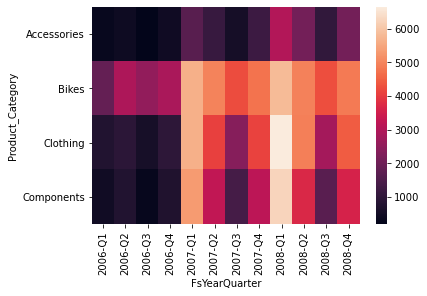

In [21]:
df5=pd.pivot_table(df1[df1['Sales_Region'].isin(['United States'])],
              values='OrderQty',
              index=['Product_Category'],
              columns=['FsYearQuarter'],
              aggfunc='sum').fillna(0)

cl=sns.light_palette("lightgreen", as_cmap=True)
display(df5.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl).format("{:,.0f}", na_rep="-").set_caption('Heat Map of Order Quantity by Region and Product Category in United States'))
display(sns.heatmap(df5))

FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Sub_Category,,,,,,,,,,,,
Road Bikes,"1,049","1,846","1,651","1,841","3,845","3,393","2,918","3,283","2,238","1,905","1,715","1,899"
Mountain Bikes,812,"1,096",902,"1,050","1,822","1,582","1,323","1,476","1,852","1,645","1,336","1,554"
Jerseys,343,406,256,443,"1,092",818,408,693,"2,375","1,566",861,"1,428"
Touring Bikes,0,0,0,0,0,0,0,0,"1,754","1,411","1,226","1,392"
Shorts,0,0,0,0,491,396,195,367,"1,309","1,020",754,975
Mountain Frames,169,234,134,251,943,691,369,696,"1,608","1,024",553,956
Helmets,321,427,183,453,"1,123",796,380,853,"1,139",779,404,784
Vests,0,0,0,0,0,0,0,0,"1,007",800,453,689
Socks,245,291,193,287,0,0,0,0,821,710,405,649


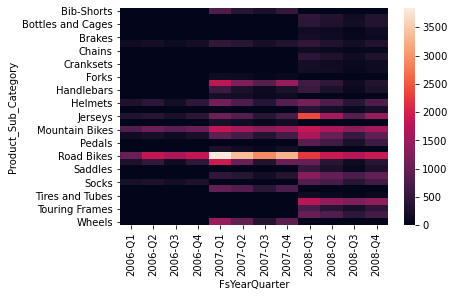

In [22]:
df6=pd.pivot_table(df1[df1['Sales_Region'].isin(['United States'])],
              values='OrderQty',
              index=['Product_Sub_Category'],
              columns=['FsYearQuarter'],
              aggfunc='sum').fillna(0)
cl=sns.light_palette("lightgreen", as_cmap=True)
display(df6.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl).format("{:,.0f}", na_rep="-").set_caption('Heat Map of Order Quantity by Region and Product Sub Category in United States'))
display(sns.heatmap(df6))

FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Category,,,,,,,,,,,,
Bikes,"3,973,427","6,230,459","5,330,118","5,619,999","8,091,892","7,197,139","6,009,294","6,846,818","8,193,211","7,172,530","6,291,287","7,057,229"
Components,"344,698","532,753","239,713","545,423","2,353,349","1,354,613","541,754","1,363,491","2,387,351","1,311,391","556,454","1,338,732"
Clothing,"20,840","24,998","15,833","26,683","292,847","209,310","119,750","211,153","300,075","221,623","134,866","201,285"
Accessories,"11,232","14,933","6,403","15,850","49,874","35,411","17,287","37,543","121,795","85,579","42,746","85,186"


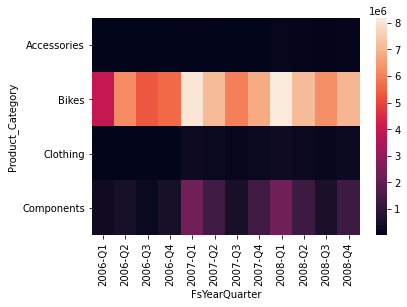

In [23]:
df7=pd.pivot_table(df1[df1['Sales_Region'].isin(['United States'])],
              values='Revenue',
              index=['Product_Category'],
              columns=['FsYearQuarter'],
              aggfunc='sum').fillna(0)

cl=sns.light_palette("lightgreen", as_cmap=True)
display(df7.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl).format("{:,.0f}", na_rep="-").set_caption('Heat Map of Revenue by Region and Product Category in United States'))
display(sns.heatmap(df7))

FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Sub_Category,,,,,,,,,,,,
Road Bikes,"1,226,848","2,520,639","2,275,227","2,489,959","4,619,237","4,185,708","3,550,491","4,084,577","3,182,410","2,649,516","2,402,635","2,681,858"
Mountain Bikes,"2,746,579","3,709,821","3,054,891","3,130,040","3,472,655","3,011,432","2,458,802","2,762,241","2,630,296","2,360,999","2,052,995","2,255,359"
Touring Bikes,0,0,0,0,0,0,0,0,"2,380,506","2,162,014","1,835,657","2,120,012"
Mountain Frames,"229,364","317,714","181,875","340,806","761,943","546,676","283,895","561,476","828,489","578,713","282,516","553,860"
Touring Frames,0,0,0,0,0,0,0,0,"532,414","296,790","129,373","346,518"
Road Frames,"115,335","215,039","57,838","204,618","1,178,482","537,784","147,746","548,173","779,647","273,532","66,134","282,315"
Jerseys,"17,147","20,284","12,797","22,101","54,018","40,783","20,373","34,545","122,315","81,408","44,997","74,509"
Shorts,0,0,0,0,"29,342","23,680","11,698","22,016","87,678","69,266","51,970","66,120"
Vests,0,0,0,0,0,0,0,0,"62,483","49,736","28,650","43,219"


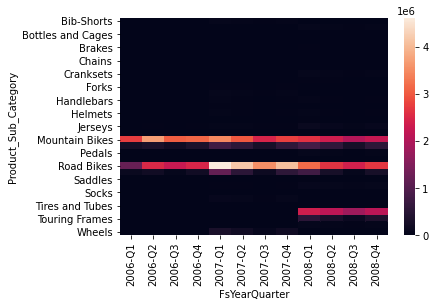

In [24]:
df8=pd.pivot_table(df1[df1['Sales_Region'].isin(['United States'])],
              values='Revenue',
              index=['Product_Sub_Category'],
              columns=['FsYearQuarter'],
              aggfunc='sum').fillna(0)
cl=sns.light_palette("lightgreen", as_cmap=True)
display(df8.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl).format("{:,.0f}", na_rep="-").set_caption('Heat Map of Revenue by Region and Product Sub Category in United States'))
display(sns.heatmap(df8))

FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Category,,,,,,,,,,,,
Accessories,"-11,406","-21,542","-7,016","-20,189","-29,908","-19,897","-5,794","-20,713","-20,051","-12,269","-6,841","-22,126"
Bikes,"1,550,564","2,377,640","2,022,036","1,906,347","2,981,777","2,680,468","2,193,436","2,546,220","2,807,232","2,614,681","2,277,928","1,459,329"
Clothing,"-44,224","-67,190","-49,014","-58,990","-62,658","-37,632","-31,976","-35,806","-88,475","-48,978","-31,894","-73,089"
Components,"125,270","186,005","90,163","198,298","817,842","478,182","198,428","485,152","769,653","433,190","184,312","257,498"


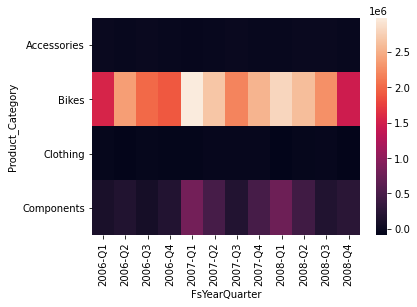

In [25]:
df9=pd.pivot_table(df1[df1['Sales_Region'].isin(['United States'])],
              values='Margin',
              index=['Product_Category'],
              columns=['FsYearQuarter'],
              aggfunc='sum').fillna(0)
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color
cl=sns.light_palette("lightgreen", as_cmap=True)
display(df9.style.background_gradient(cmap=cl).format("{:,.0f}", na_rep="-").applymap(color_negative_red).set_caption('Heat Map of Margin by Region and Product Category in United States'))
display(sns.heatmap(df9))

FsYear,2006,2007,2008
Product_Sub_Category,,,
Mountain Bikes,"4,820,039","4,995,036","3,605,660"
Road Bikes,"3,036,549","5,406,866","3,147,000"
Touring Bikes,0,0,"2,406,510"


FsYearQuarter,2006-Q1,2006-Q2,2006-Q3,2006-Q4,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4
Product_Sub_Category,,,,,,,,,,,,
Mountain Bikes,"1,110,896","1,475,641","1,217,344","1,016,158","1,487,113","1,290,896","1,031,638","1,185,389","1,118,196","1,010,104","864,550","612,810"
Road Bikes,"439,668","901,999","804,692","890,190","1,494,665","1,389,573","1,161,798","1,360,831","1,041,559","872,941","780,551","451,949"
Touring Bikes,0,0,0,0,0,0,0,0,"647,477","731,637","632,826","394,570"


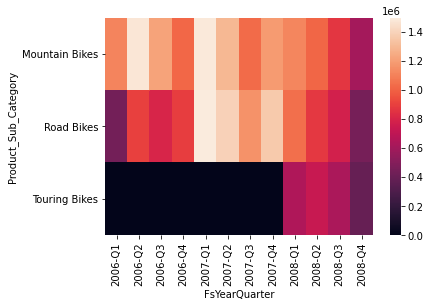

In [26]:
df100=pd.pivot_table(df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes'])) ],
              values='Margin',
              index=['Product_Sub_Category'],
              columns=['FsYear'],
              aggfunc='sum').fillna(0)
df101=pd.pivot_table(df1[(df1['Sales_Region'].isin(['United States'])) & (df1['Product_Category'].isin(['Bikes'])) ],
              values='Margin',
              index=['Product_Sub_Category'],
              columns=['FsYearQuarter'],
              aggfunc='sum').fillna(0)
cl=sns.light_palette("lightgreen", as_cmap=True)
display(df100.sort_values(by=(2008), ascending=False).style.background_gradient(cmap=cl).format("{:,.0f}", na_rep="-").applymap(color_negative_red).set_caption('Heat Map of Margin by Product Sub Category in United States'))
display(df101.sort_values(by=('2008-Q4'), ascending=False).style.background_gradient(cmap=cl).format("{:,.0f}", na_rep="-").applymap(color_negative_red).set_caption('Heat Map of Margin by Product Sub Category in United States'))
display(sns.heatmap(df101))